# Predicting using Neural Network on the Diabetes dataset

In [103]:
# Importing Libraries
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [104]:
# Printing description of the dataset
print(datasets.load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Getting our features and vectors

In [105]:
X = datasets.load_diabetes(as_frame=True)['data']
y = datasets.load_diabetes(as_frame=True)['target']

print(f'Shape of the features: {X.shape}')
print(f'Shape of the targets: {y.shape}')

Shape of the features: (442, 10)
Shape of the targets: (442,)


### Printing out first five features

In [106]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Describing the features

In [107]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [108]:
# Printing out first five labels

y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [109]:
# Describing the labels

y.describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


### Split the data into X_train, X_test, y_train, y_test with test size of 0.2

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of training labels: {y_train.shape}')
print(f'Shape of testing features: {X_test.shape}')
print(f'Shape of testing labels: {y_test.shape}')

Shape of training features: (353, 10)
Shape of training labels: (353,)
Shape of testing features: (89, 10)
Shape of testing labels: (89,)


In [111]:
def plot(train, val):
    '''
    Function that plots the training and validation accuracy
    '''
    plt.rcParams['figure.figsize'] = (5,5)
    plt.plot(train, 'r', label='loss')
    plt.plot(train, 'r.')
    plt.plot(val, 'b', label='val_loss')
    plt.plot(val, 'b.')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Keras for building Neural Network

In [112]:
# Importing lobraries for Keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import keras.backend as K

In [113]:
# Building the model

model = Sequential()

model.add(Dense(60, input_shape = (10,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "relu"))

model.compile(Adam(learning_rate=0.01), "mean_absolute_error")
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 60)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           915 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,591 (6.21 KB)

 Trainable params: 1,591 (6.21 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Training the model
EPOCHS = 100
history = model.fit(X_train, y_train, verbose=1, epochs=EPOCHS, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 159.1658 - val_loss: 131.6289
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 156.3448 - val_loss: 123.6259
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 140.3399 - val_loss: 104.6255
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 122.1083 - val_loss: 70.5646
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83.0267 - val_loss: 50.4366
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 61.5714 - val_loss: 63.9573
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 66.6541 - val_loss: 56.6708
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.8223 - val_loss: 47.6238
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 56.1222 - val_loss: 47.9742
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 50.3290 - val_loss: 49.8721
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.1032 - val_loss: 48.5237
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

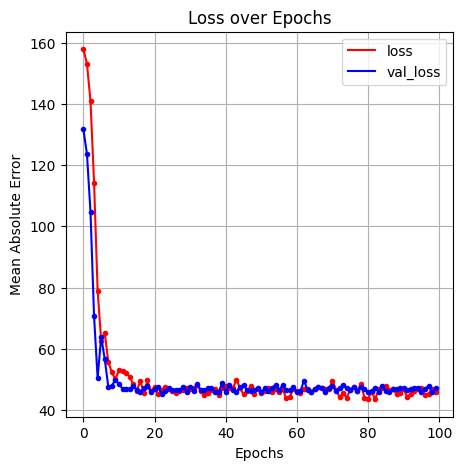

In [115]:
# Plotting the results
plot(history.history['loss'], history.history['val_loss'])

In [116]:
# Predicting Test Loss

y_pred = model.predict(X_test).reshape(-1)
loss = np.sum(abs(y_pred-y_test))/len(y_test)
print('Test Loss:', loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test Loss: 42.42231506176209


# PyTorch for building the same network

In [117]:
# Importing necessary libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torch.optim as optim
from torch.utils.data import Dataset

### Construct the neural network with PyTorch
Linear Layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html \
Dropout Layers: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html \
ReLu Layers: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

In [118]:
# Creating a model

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            # Construct the Neural network (same structure as the Keras NN) with PyTorch

            # A linear layer with 10x60 size node
            nn.Linear(10, 60),
            # A ReLu layer
            nn.ReLU(),
            # A Linear layer with 60x15 size
            nn.Linear(60, 15),
            # A ReLu layer
            nn.ReLU(),
            # A Dropout layer with probability of 0.2
            nn.Dropout(0.2),
            # A Linear Layer of 15x1 size
            nn.Linear(15, 1)

        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=15, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=15, out_features=1, bias=True)
  )
)


In [119]:
# Splitting validation data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [120]:
# Creating custom dataloaders for feeding into the network

class MyDataset(Dataset):
    def __init__(self, X, y):
        '''
        Constructor that takes in, the features and labels
        '''
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        '''
        Function that returns the length of the dataloader
        '''
        return len(self.y)

    def __getitem__(self,idx):
        '''
        Function that returns the data at index @idx
        '''
        return self.X[idx], self.y[idx]



In [121]:
# Training, Testing and Validation Dataloaders

train_loader = DataLoader(MyDataset(X_train.values, y_train.values), batch_size=32, shuffle=True)


In [122]:
len(train_loader)

9

### Use DataLoader to load:
### X_val, y_val to val_loader with a batch size of 32
### X_test, y_test to test_loader with a batch size of 32

In [123]:
val_loader = DataLoader(MyDataset(X_val.values, y_val.values), batch_size=32, shuffle=False)
test_loader = DataLoader(MyDataset(X_test.values, y_test.values), batch_size=32, shuffle=False)

##Training loop

In [124]:
# Dictionary storing the losses
loss_stats = {
    'train': [],
    "val": [],
    "test": []
}

print("Begin training.")
for e in range(1, EPOCHS+1):
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()


    # VALIDATION
    with torch.no_grad():
        val_epoch_loss = 0
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            y_val_pred = model(X_val_batch)
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.
Epoch 001: | Train Loss: 143.42698 | Val Loss: 126.27806
Epoch 002: | Train Loss: 86.03061 | Val Loss: 68.74757
Epoch 003: | Train Loss: 72.16159 | Val Loss: 77.03892
Epoch 004: | Train Loss: 63.08392 | Val Loss: 56.86469
Epoch 005: | Train Loss: 63.67841 | Val Loss: 59.43252
Epoch 006: | Train Loss: 61.17962 | Val Loss: 51.09088
Epoch 007: | Train Loss: 56.75139 | Val Loss: 52.77650
Epoch 008: | Train Loss: 59.25504 | Val Loss: 54.95134
Epoch 009: | Train Loss: 59.15888 | Val Loss: 48.21414
Epoch 010: | Train Loss: 61.35136 | Val Loss: 58.48204
Epoch 011: | Train Loss: 59.63182 | Val Loss: 51.64317
Epoch 012: | Train Loss: 53.77952 | Val Loss: 59.08917
Epoch 013: | Train Loss: 53.49585 | Val Loss: 53.94671
Epoch 014: | Train Loss: 59.11063 | Val Loss: 47.74700
Epoch 015: | Train Loss: 59.11317 | Val Loss: 56.15892
Epoch 016: | Train Loss: 54.28867 | Val Loss: 47.77150
Epoch 017: | Train Loss: 58.04816 | Val Loss: 57.88172
Epoch 018: | Train Loss: 61.14943 | Val Loss: 5

### Predict the final test loss with the test_loader (HINT: Use the validation code)

In [125]:
# Predicting Test Loss
with torch.no_grad():
    test_epoch_loss = 0
    model.eval()
    for X_test_batch, y_test_batch in test_loader:
        y_test_pred = model(X_test_batch)
        test_loss = criterion(y_test_pred, y_test_batch.unsqueeze(1))
        test_epoch_loss += test_loss.item()

loss_stats['test'].append(test_epoch_loss/len(test_loader))

print(f'Test Loss: {loss_stats["test"][0]:.5f}')

Test Loss: 45.05430


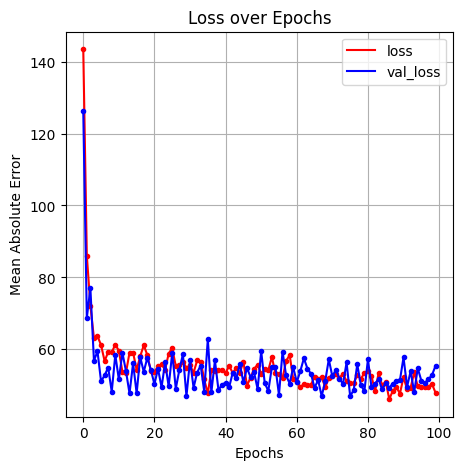

In [126]:
# Plotting the results

plot(loss_stats['train'], loss_stats['val'])